# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import os
import openpyxl
import xlrd
from functools import reduce
import datetime

# Import Data Files

In [2]:
file = (r'c:/Users/pjant/Desktop/Machine-Learning-Python/Dataset.xlsx')
sheet_name = ('Data Table Training')

In [3]:
df_swapIV = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','IV'), usecols=(1,2))
df_swapRates = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','Rates'), usecols=(4,5) )
df_swapHV = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date', 'HV'), usecols=(4,6))
df_VIX = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date', 'VIX'), usecols=(8,9))
df_curve = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','Curve'), usecols=(11,12))
df_SPX = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','SPX'), usecols=(14,15))
df_SPXHV = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','SPXHV'), usecols=(14,16))
df_CDXHY = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','CDXHY'),usecols=(18,19))
df_Spreads = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','Spreads'),usecols=(21,22))
df_HYG = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','HYG'),usecols=(25,26))

# Create Data Frame

In [4]:
data_frames = [df_swapIV, df_swapRates, df_swapHV, df_VIX, df_curve, df_SPX, df_SPXHV, df_Spreads, df_HYG]

In [5]:
for i in data_frames:
    i = i.set_index('Date', inplace=True)

In [6]:
df = reduce(lambda  left,right:pd.merge(left,right,left_index=True,right_index=True),data_frames)

In [7]:
df = df.fillna(method='ffill')

In [8]:
df.tail()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2020-05-13,66.6914,0.6162,0.451336,35.28,0.3647,2820.00,27.282796,-3.63,78.87
2020-05-14,66.9021,0.5914,0.457408,32.61,0.3434,2852.50,24.159632,-3.12,78.60
2020-05-15,65.8000,0.6263,0.493792,31.89,0.3559,2863.70,24.083597,-1.88,78.71
2020-05-18,66.8451,0.7080,0.618496,29.30,0.4520,2953.91,24.152846,-1.87,80.10
2020-05-19,66.3517,0.6715,0.654623,30.53,0.4141,2922.94,25.142984,-1.75,80.20


In [9]:
#df_w = df.groupby(pd.Grouper(freq='W')).nth(0)
df_w = df[df.index.dayofweek==4]

In [10]:
df_w

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2007-09-21,96.2500,5.2655,2.160149,19.00,0.5990,1438.87,6.817902,64.30,103.75
2007-09-28,97.9500,5.2110,0.680752,18.00,0.5540,1472.50,7.473062,62.50,104.00
2007-10-05,89.9500,5.2590,1.220172,16.91,0.4670,1495.42,8.230265,63.00,103.90
2007-10-12,80.9500,5.3005,0.635791,17.73,0.4380,1495.92,9.388424,61.70,104.50
2007-10-19,86.1500,5.0390,0.524584,22.96,0.5545,1512.58,6.634837,64.50,102.80
...,...,...,...,...,...,...,...,...,...
2020-04-17,78.5064,0.7128,1.001000,38.15,0.2967,2874.56,38.769620,7.00,81.09
2020-04-24,72.8300,0.6323,0.403004,35.93,0.2483,2836.74,18.888296,3.00,78.32
2020-05-01,60.1500,0.6195,0.517108,37.19,0.2831,2830.71,36.552269,0.50,78.68


# Examine Data

In [11]:
df_w.tail()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2020-04-17,78.5064,0.7128,1.001000,38.15,0.2967,2874.56,38.769620,7.00,81.09
2020-04-24,72.8300,0.6323,0.403004,35.93,0.2483,2836.74,18.888296,3.00,78.32
2020-05-01,60.1500,0.6195,0.517108,37.19,0.2831,2830.71,36.552269,0.50,78.68
2020-05-08,67.0854,0.6439,0.553637,27.98,0.3844,2929.80,24.884263,-4.13,79.75
2020-05-15,65.8000,0.6263,0.493792,31.89,0.3559,2863.70,24.083597,-1.88,78.71


In [12]:
df_w.corr()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
IV,1.000000,0.535707,0.652515,0.699024,0.469477,-0.678073,0.448834,0.555142,-0.316348
Rates,0.535707,1.000000,0.344468,0.219929,0.365497,-0.448881,0.091790,0.773202,0.229413
HV,0.652515,0.344468,1.000000,0.539002,0.235238,-0.363353,0.302432,0.388351,-0.218619
VIX,0.699024,0.219929,0.539002,1.000000,0.119000,-0.350804,0.502942,0.348173,-0.588840
Curve,0.469477,0.365497,0.235238,0.119000,1.000000,-0.814716,0.076001,0.245279,0.208621
SPX,-0.678073,-0.448881,-0.363353,-0.350804,-0.814716,1.000000,-0.276754,-0.456816,-0.089972
SPXHV,0.448834,0.091790,0.302432,0.502942,0.076001,-0.276754,1.000000,0.159985,-0.413393
Spreads,0.555142,0.773202,0.388351,0.348173,0.245279,-0.456816,0.159985,1.000000,0.345567
HYG,-0.316348,0.229413,-0.218619,-0.588840,0.208621,-0.089972,-0.413393,0.345567,1.000000


In [13]:
df_w.describe()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,90.600334,2.667494,0.860307,19.736625,1.287113,1839.285237,15.809615,11.126956,88.048542
std,31.416687,0.895939,0.550235,10.079264,0.816623,646.497231,14.325312,20.258891,6.098863
min,49.015000,0.619500,0.067614,9.140000,-0.132500,683.380000,1.006518,-17.250000,62.000000
25%,68.200000,2.062375,0.510786,13.340000,0.565975,1315.397500,7.183266,-1.470000,85.707500
50%,80.975000,2.505350,0.728467,16.845000,1.312850,1765.020000,11.423717,8.250000,87.980000
75%,107.056250,3.112000,1.068658,22.555000,1.974125,2329.415000,19.455393,14.970000,91.870000
max,212.650000,5.300500,4.911519,79.130000,2.782800,3373.940000,140.164278,86.000000,104.500000


C:\Users\pjant\Miniconda3\envs\data601\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


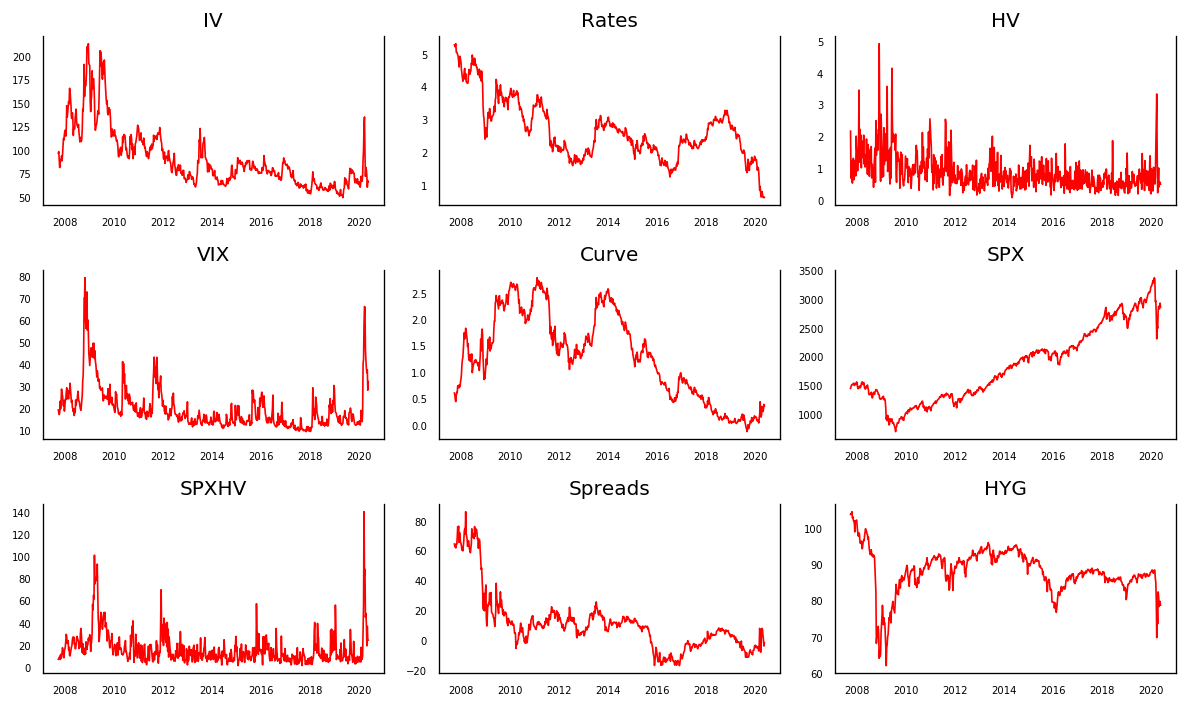

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_w[df_w.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df_w.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

In [15]:
df_w.isna().sum()

IV         0
Rates      0
HV         0
VIX        0
Curve      0
SPX        0
SPXHV      0
Spreads    0
HYG        0
dtype: int64

# Run a Lag Plot on the Raw Data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_w), columns = df_w.columns)

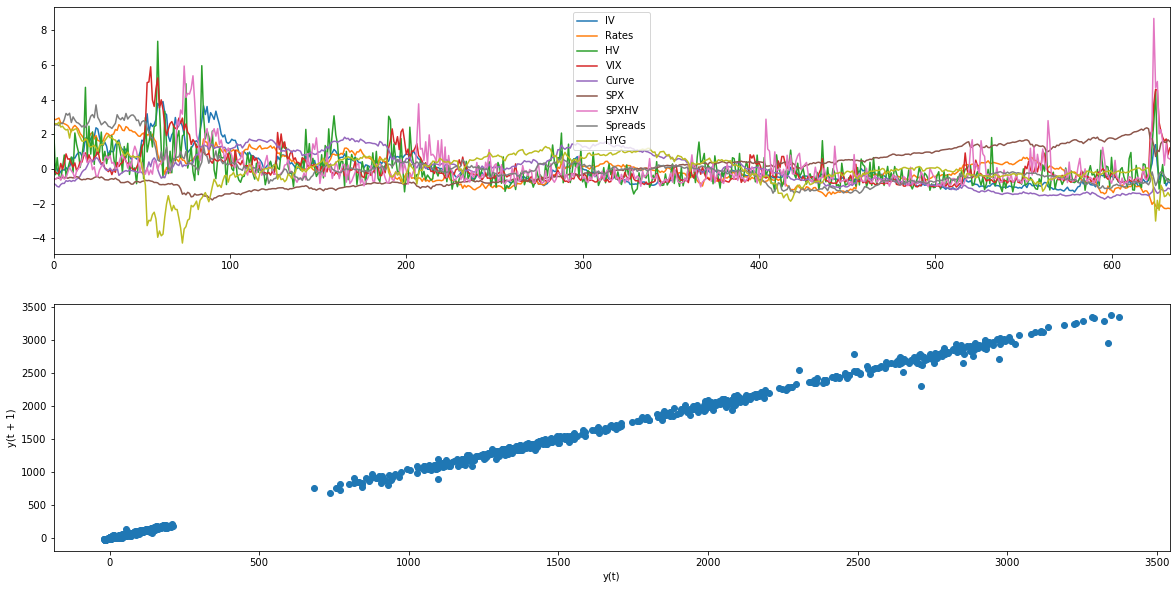

In [17]:
# Is the data Random.  Random data will not exhibit a structure in the lag plot

fig,(ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(20,10))
df_scaled.plot(ax=ax1) # series plot
pd.plotting.lag_plot(df_w) #lag plot

# Run Autocorrelation Plots on each of the Raw Variables for All Days in the Time Series

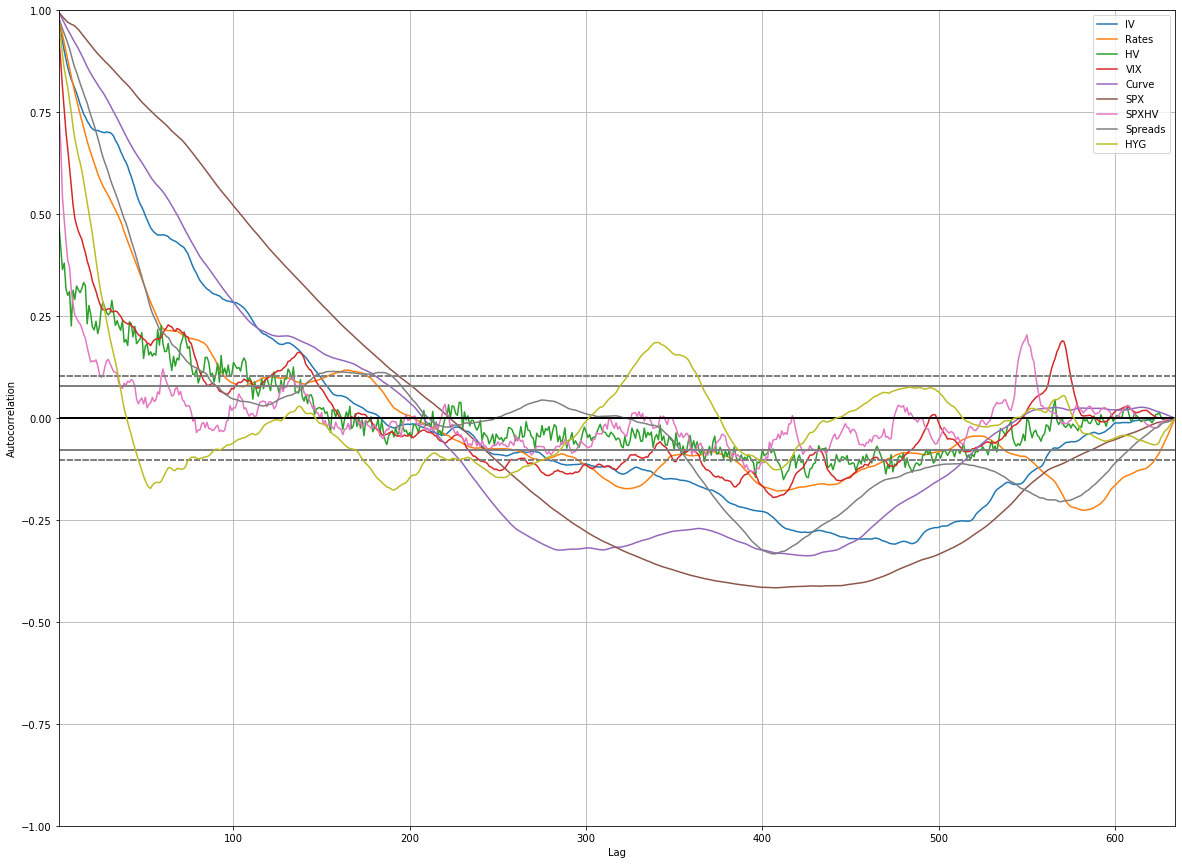

In [18]:
plt.rcParams["figure.figsize"] = (20,15)
pd.plotting.autocorrelation_plot(df_w.IV, label = 'IV')
pd.plotting.autocorrelation_plot(df_w.Rates, label = 'Rates')
pd.plotting.autocorrelation_plot(df_w.HV, label = 'HV')
pd.plotting.autocorrelation_plot(df_w.VIX, label = 'VIX')
pd.plotting.autocorrelation_plot(df_w.Curve, label = 'Curve')
pd.plotting.autocorrelation_plot(df_w.SPX, label = 'SPX')
pd.plotting.autocorrelation_plot(df_w.SPXHV, label = 'SPXHV')
pd.plotting.autocorrelation_plot(df_w.Spreads, label = 'Spreads')
pd.plotting.autocorrelation_plot(df_w.HYG, label = 'HYG')

# Run Autocorrelation and PACF plots for each raw variable for 75 days

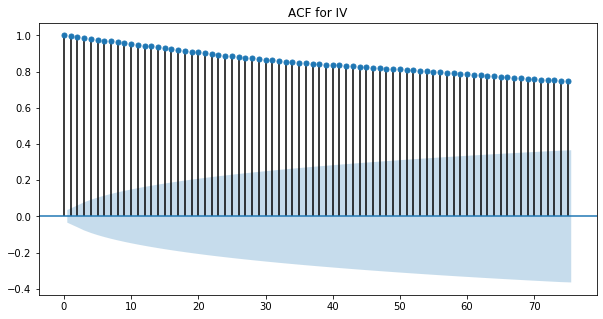

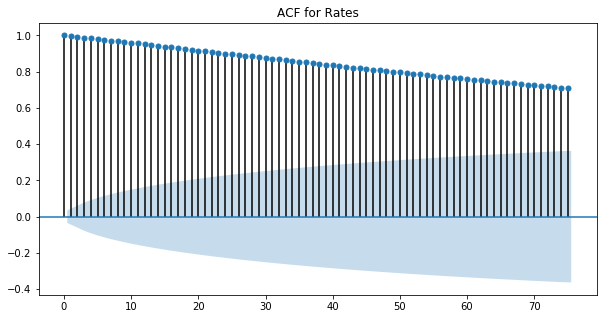

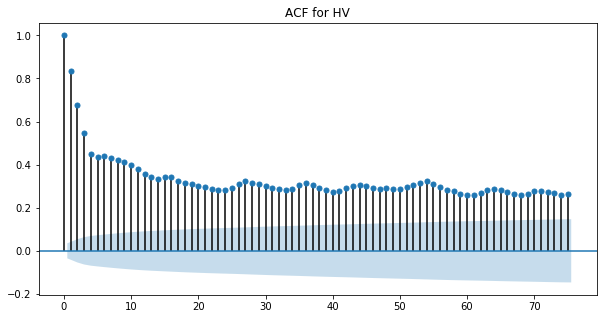

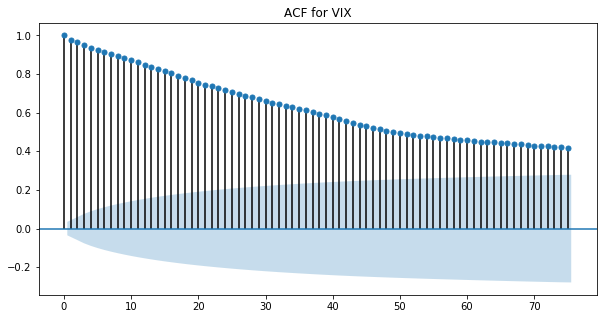

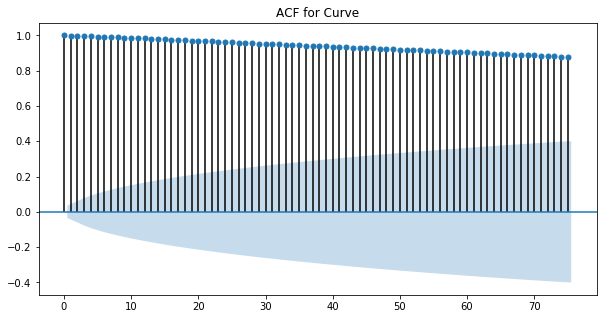

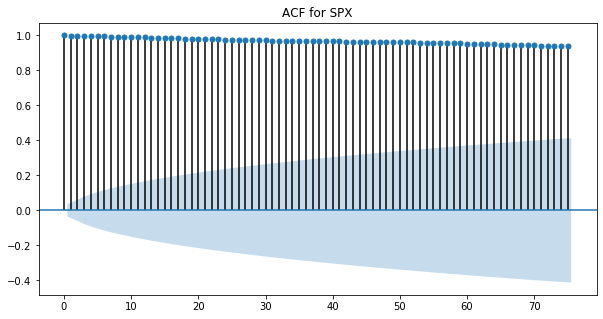

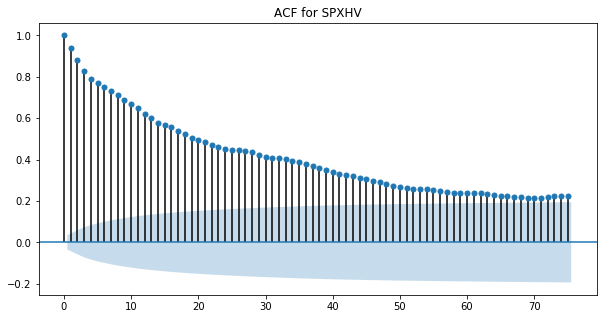

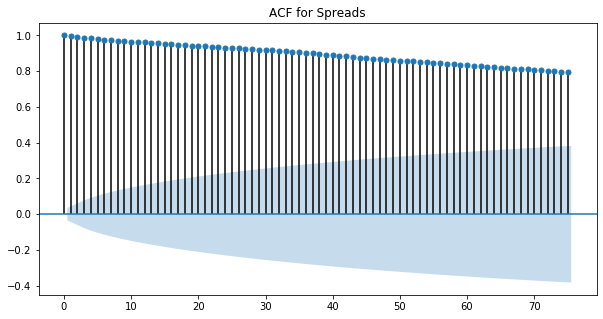

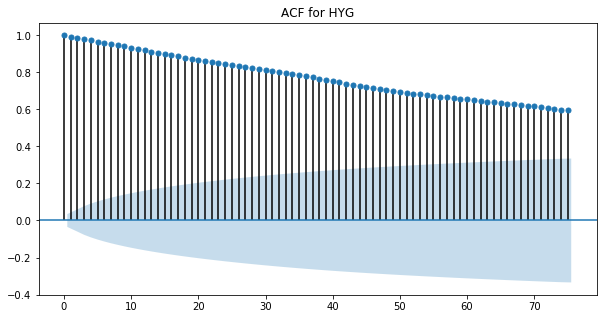

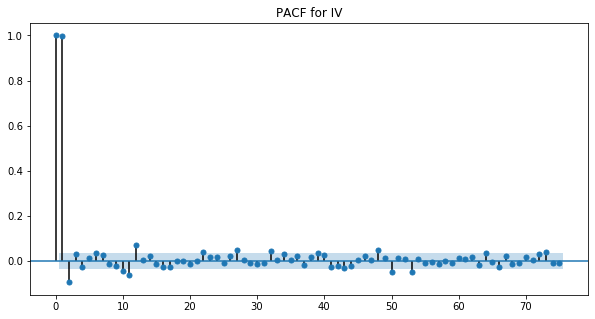

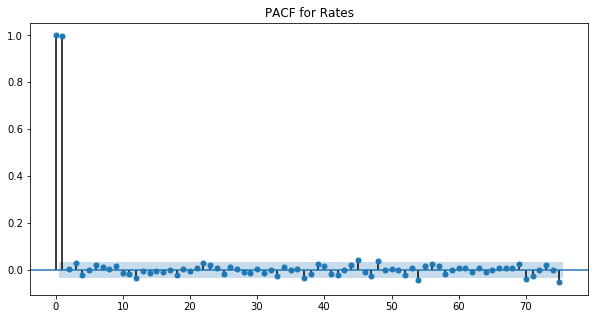

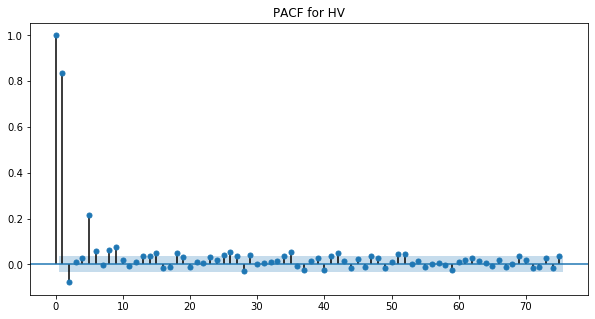

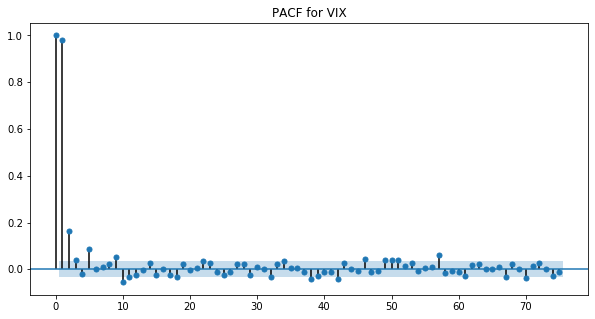

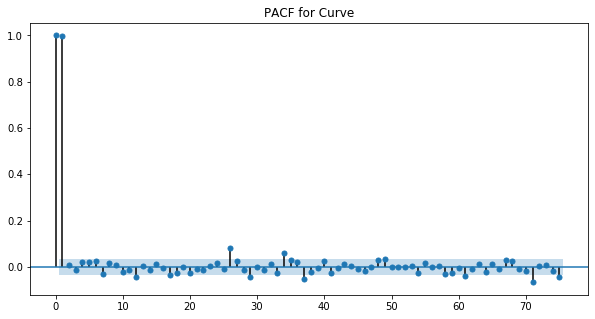

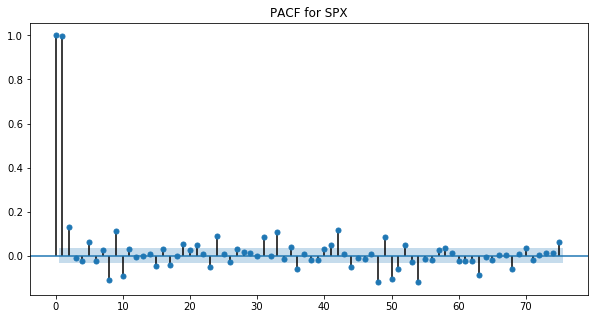

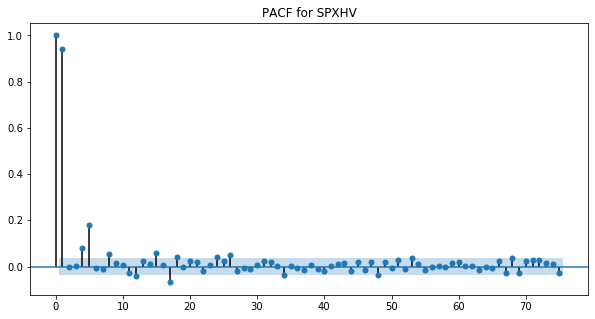

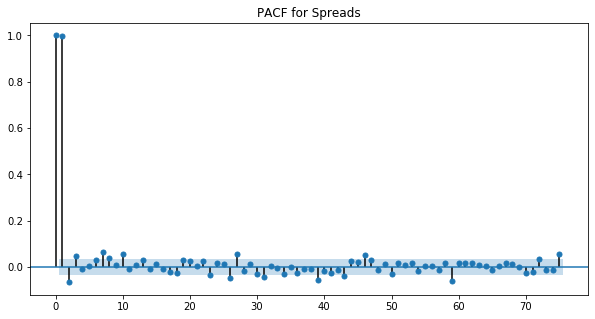

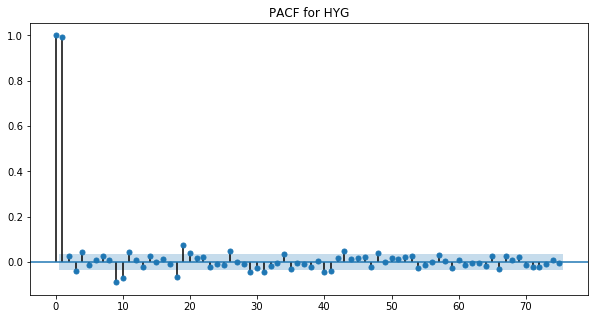

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.rcParams["figure.figsize"] = (10,5)
for i in df_w:
    plot_acf(df[i],lags=75)
    plt.title('ACF for %s'%i)
    
for j in df_w:
    plot_pacf(df[j], lags=75)
    plt.title('PACF for %s'%j)

# Run Granger Causality Tests on Every Raw Variable

The below block of code creates a function called 'grangers_causation_matrix', which runs each pair of columns against each other, n=maxlag times, and stores the minimum p-value for the given 'test' in a new 'column-by-column' dimension matrix

In [20]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df_granger = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_granger.columns:
        for r in df_granger.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df_granger.loc[r, c] = min_p_value
    df_granger.columns = [var + '_x' for var in variables]
    df_granger.index = [var + '_y' for var in variables]
    return df_granger

grangers_causation_matrix(df_w, variables = df.columns)

# ran the block of code in detail - the below warning shows up (after making both of the above "verbose=True") at
# maxlag=10 for r='Spreads' and c='Spreads'

,IV_x,Rates_x,HV_x,VIX_x,Curve_x,SPX_x,SPXHV_x,Spreads_x,HYG_x
IV_y,1.0000,0.0000,0.0186,0.0678,0.0120,0.0165,0.0002,0.0000,0.2354
Rates_y,0.0011,1.0000,0.0073,0.0001,0.2921,0.0682,0.3432,0.0018,0.0000
HV_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
VIX_y,0.0009,0.0053,0.0961,1.0000,0.0022,0.0739,0.0348,0.0039,0.0119
Curve_y,0.0004,0.1005,0.0005,0.0000,1.0000,0.0002,0.0193,0.0078,0.0000
SPX_y,0.0000,0.2876,0.0035,0.0000,0.3110,1.0000,0.0000,0.1963,0.0103
SPXHV_y,0.0000,0.2486,0.0000,0.0000,0.6405,0.0000,1.0000,0.0032,0.0000
Spreads_y,0.0024,0.0019,0.0015,0.0012,0.0510,0.3998,0.0557,1.0000,0.0000
HYG_y,0.0009,0.0012,0.0012,0.0000,0.0010,0.0262,0.0000,0.0030,1.0000


Below code block is simply a copy and detailed explanation of each line of code for the 'grangers_causation_matrix' function created above

In [21]:
maxlag=12
test = 'ssr_chi2test'
variables = df_w.columns
verbose=False

#first, create a 'variable'-by-'variable' size dataframe filled with 0 values, with column names 'variables', 
# and indexes 'variables'
df_granger = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

#run a granger causality test on each column v. each column in the original dataframe, and fill the above dataframe
#with the results
for c in df_granger.columns:  # for each column
    for r in df_granger.index: # begin with, and continue through, each row
        test_result = grangercausalitytests(df_w[[r, c]], maxlag=maxlag, verbose=False) #calculating the GCT - r is a column, and c is a different column
        p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)] #see note below for output of grangercausalitytests (here, 'test_result')
        if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
        min_p_value = np.min(p_values) #see note below
        df_granger.loc[r, c] = min_p_value #store the minimum p-value in the current r,c location of the new dataframe 
df_granger.columns = [var + '_x' for var in variables] #rename the column_heads as the x variables
df_granger.index = [var + '_y' for var in variables] #rename the row.indexes as the y variables
df_granger

#the output of the granger causality test is:
# 1) a dictionary of
# 2) n = maxlag results
# 3) each 2) above, or n, contains
# 4) 2 items
# 5) First, a dictionary of:
#   a) ssr_ftest: (1,2,3,4)
#   b) ssr_chi2test: (1,2,3)
#   c) lrtest: (1,2,3)
#   d) params_ftest
# 6) Second, 3 'results'
#   a) <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x18ea25b0198>
#   b) <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x18ea25b0668>
#   c) array([[0.,1.,0.]])
#As a result the code line above 'p_values = ...' pulls the 2nd number of the ssr_chi2test above for each of the maxlags,
#and then the 'min_p_value = ...' stores the minimum of these values for all of the maxlag runs

,IV_x,Rates_x,HV_x,VIX_x,Curve_x,SPX_x,SPXHV_x,Spreads_x,HYG_x
IV_y,1.0000,0.0000,0.0186,0.0678,0.0120,0.0165,0.0002,0.0000,0.2354
Rates_y,0.0011,1.0000,0.0073,0.0001,0.2921,0.0682,0.3432,0.0018,0.0000
HV_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
VIX_y,0.0009,0.0053,0.0961,1.0000,0.0022,0.0739,0.0348,0.0039,0.0119
Curve_y,0.0004,0.1005,0.0005,0.0000,1.0000,0.0002,0.0193,0.0078,0.0000
SPX_y,0.0000,0.2876,0.0035,0.0000,0.3110,1.0000,0.0000,0.1963,0.0103
SPXHV_y,0.0000,0.2486,0.0000,0.0000,0.6405,0.0000,1.0000,0.0032,0.0000
Spreads_y,0.0024,0.0019,0.0015,0.0012,0.0510,0.3998,0.0557,1.0000,0.0000
HYG_y,0.0009,0.0012,0.0012,0.0000,0.0010,0.0262,0.0000,0.0030,1.0000


The 2 code blocks below are simply a way to test each of the individual results in the above matrix for correctness.  Not necessary to run, just here in case of 'suspicious' values that need to be checked.

In [22]:
granger = grangercausalitytests(df_w[['HYG','IV']], maxlag=12, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8514  , p=0.3565  , df_denom=630, df_num=1
ssr based chi2 test:   chi2=0.8554  , p=0.3550  , df=1
likelihood ratio test: chi2=0.8548  , p=0.3552  , df=1
parameter F test:         F=0.8514  , p=0.3565  , df_denom=630, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3205  , p=0.2677  , df_denom=627, df_num=2
ssr based chi2 test:   chi2=2.6621  , p=0.2642  , df=2
likelihood ratio test: chi2=2.6565  , p=0.2649  , df=2
parameter F test:         F=1.3205  , p=0.2677  , df_denom=627, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8706  , p=0.0358  , df_denom=624, df_num=3
ssr based chi2 test:   chi2=8.7085  , p=0.0334  , df=3
likelihood ratio test: chi2=8.6489  , p=0.0343  , df=3
parameter F test:         F=2.8706  , p=0.0358  , df_denom=624, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.3693  , p=0.0017  

In [23]:
a = 0
b = 1

print(granger[1][a]['ssr_chi2test'][b])
print(granger[2][a]['ssr_chi2test'][b])
print(granger[3][a]['ssr_chi2test'][b])
print(granger[4][a]['ssr_chi2test'][b])
print(granger[5][a]['ssr_chi2test'][b])
print(granger[6][a]['ssr_chi2test'][b])
print(granger[7][a]['ssr_chi2test'][b])
print(granger[8][a]['ssr_chi2test'][b])
print(granger[9][a]['ssr_chi2test'][b])
print(granger[10][a]['ssr_chi2test'][b])
print(granger[11][a]['ssr_chi2test'][b])
print(granger[12][a]['ssr_chi2test'][b])

0.35502584842669793
0.264200174269792
0.03342875857074083
0.0013930931901235835
0.0009353711227450744
0.0013508013853589242
0.0013933541721119177
0.0014447125787280478
0.001723527073785906
0.003936575027308874
0.0051958990219094685
0.004854187395785816


# Run Cointegration Tests for Each of the Raw Variables

In [24]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_w)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
IV     ::  397.43    > 179.5199  =>   True
Rates  ::  281.68    > 143.6691  =>   True
HV     ::  180.51    > 111.7797  =>   True
VIX    ::  89.84     > 83.9383   =>   True
Curve  ::  47.94     > 60.0627   =>   False
SPX    ::  27.42     > 40.1749   =>   False
SPXHV  ::  11.29     > 24.2761   =>   False
Spreads ::  3.34      > 12.3212   =>   False
HYG    ::  0.12      > 4.1296    =>   False


# Run Dickey-Fuller Tests on the Raw Data to Check for Stationarity

In [25]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [26]:
# ADF Test on each column
for name, column in df_w.iteritems():      # changed this row of code - df_train to df
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "IV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7447
 No. Lags Chosen       = 0
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0666. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Rates" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2608
 No. Lags Chosen       = 2
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.1849. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root.

# Create Training and Testing Set on the Raw Data

In [27]:
nobs = 5
df_train, df_test = df_w[0:-nobs], df_w[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(629, 9)
(5, 9)


# Difference the Training Data (ADF Tests Did Not Look Good; also too much AC)

In [28]:
t = df_train.diff().dropna()
df_train.diff()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2007-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-28,1.7000,-0.0545,-1.479397,-1.00,-0.0450,33.63,0.655161,-1.80,0.25
2007-10-05,-8.0000,0.0480,0.539420,-1.09,-0.0870,22.92,0.757203,0.50,-0.10
2007-10-12,-9.0000,0.0415,-0.584381,0.82,-0.0290,0.50,1.158159,-1.30,0.60
2007-10-19,5.2000,-0.2615,-0.111207,5.23,0.1165,16.66,-2.753587,2.80,-1.70
...,...,...,...,...,...,...,...,...,...
2020-03-13,26.9825,0.1225,0.710851,15.89,0.2377,-261.35,84.072123,-7.75,-5.00
2020-03-20,7.2375,-0.1972,0.983247,8.21,-0.1737,-406.10,-57.366516,-8.25,-10.30
2020-03-27,-37.4700,-0.1258,-2.003346,-0.50,-0.1184,236.55,5.298650,4.25,7.28


# Analyze the Differenced Data

In [29]:
t.tail()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2020-03-13,26.9825,0.1225,0.710851,15.89,0.2377,-261.35,84.072123,-7.75,-5.00
2020-03-20,7.2375,-0.1972,0.983247,8.21,-0.1737,-406.10,-57.366516,-8.25,-10.30
2020-03-27,-37.4700,-0.1258,-2.003346,-0.50,-0.1184,236.55,5.298650,4.25,7.28
2020-04-03,-25.6900,0.0119,-1.104277,-18.74,0.0402,-52.82,-43.325754,9.37,-3.48
2020-04-10,9.3900,0.1558,0.374523,-5.13,0.1602,301.17,3.496796,2.38,8.81


In [30]:
t.corr()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
IV,1.000000,0.258382,0.226782,0.314023,0.210581,-0.103556,0.095322,0.158289,-0.343143
Rates,0.258382,1.000000,-0.026177,-0.327485,0.648602,0.065395,0.018722,0.245230,0.161583
HV,0.226782,-0.026177,1.000000,0.123246,0.006122,-0.094840,-0.079674,-0.005270,-0.087731
VIX,0.314023,-0.327485,0.123246,1.000000,-0.232127,-0.119252,0.068313,-0.026628,-0.592219
Curve,0.210581,0.648602,0.006122,-0.232127,1.000000,0.004399,0.081848,0.073175,0.139962
SPX,-0.103556,0.065395,-0.094840,-0.119252,0.004399,1.000000,-0.225811,0.045865,0.279973
SPXHV,0.095322,0.018722,-0.079674,0.068313,0.081848,-0.225811,1.000000,-0.022982,0.058786
Spreads,0.158289,0.245230,-0.005270,-0.026628,0.073175,0.045865,-0.022982,1.000000,0.033653
HYG,-0.343143,0.161583,-0.087731,-0.592219,0.139962,0.279973,0.058786,0.033653,1.000000


In [31]:
t.describe()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,-0.024283,-0.007098,-0.002491,0.036099,-0.000408,2.151194,0.066002,-0.090048,-0.034061
std,6.958919,0.126954,0.564163,3.755134,0.087394,46.867624,10.172626,3.214351,1.458111
min,-38.900000,-0.650000,-2.676375,-19.240000,-0.428300,-406.100000,-57.366516,-22.380000,-14.200000
25%,-2.898450,-0.080475,-0.308179,-1.605000,-0.044625,-14.972500,-4.362485,-1.372500,-0.520000
50%,-0.161650,-0.014150,-0.003930,-0.195000,-0.009500,6.140000,0.208540,-0.120000,0.055000
75%,3.042750,0.063000,0.296634,1.547500,0.045325,25.037500,4.359273,1.250000,0.500000
max,34.000000,0.564700,2.673284,24.810000,0.347300,301.170000,84.072123,18.750000,8.810000


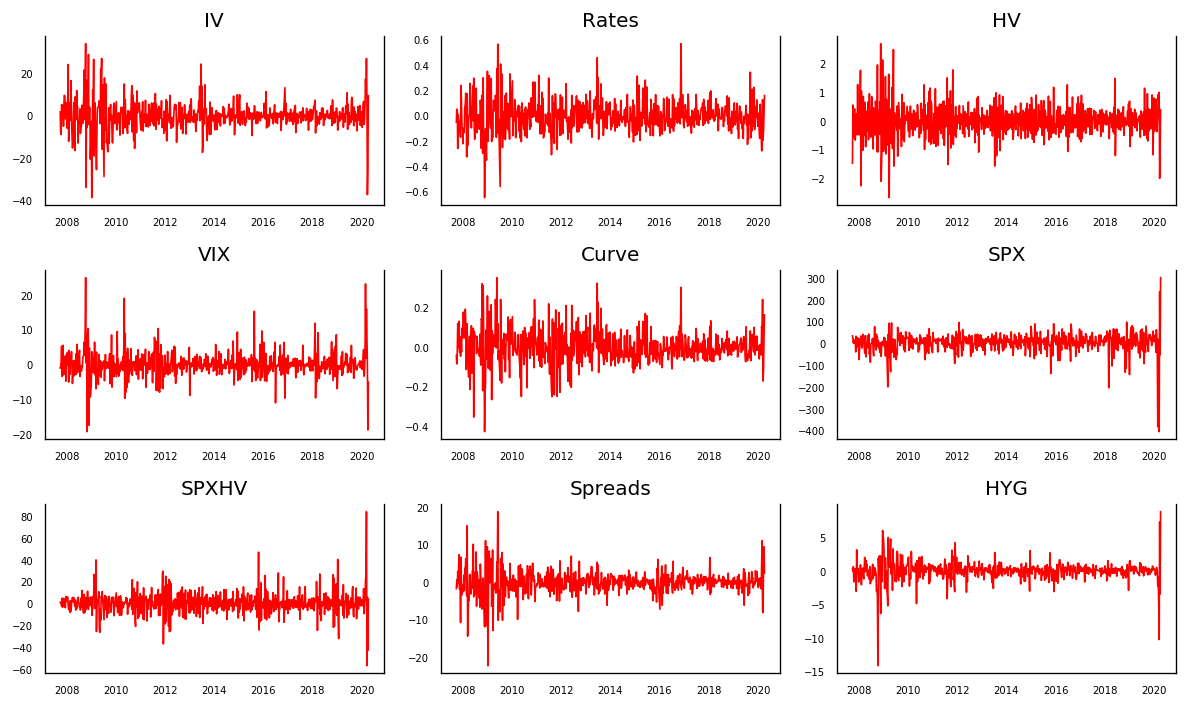

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = t[t.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(t.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

# Run a Lag Plot on the Differenced Data

In [33]:
t_scaled = pd.DataFrame(scaler.fit_transform(t), columns = t.columns)

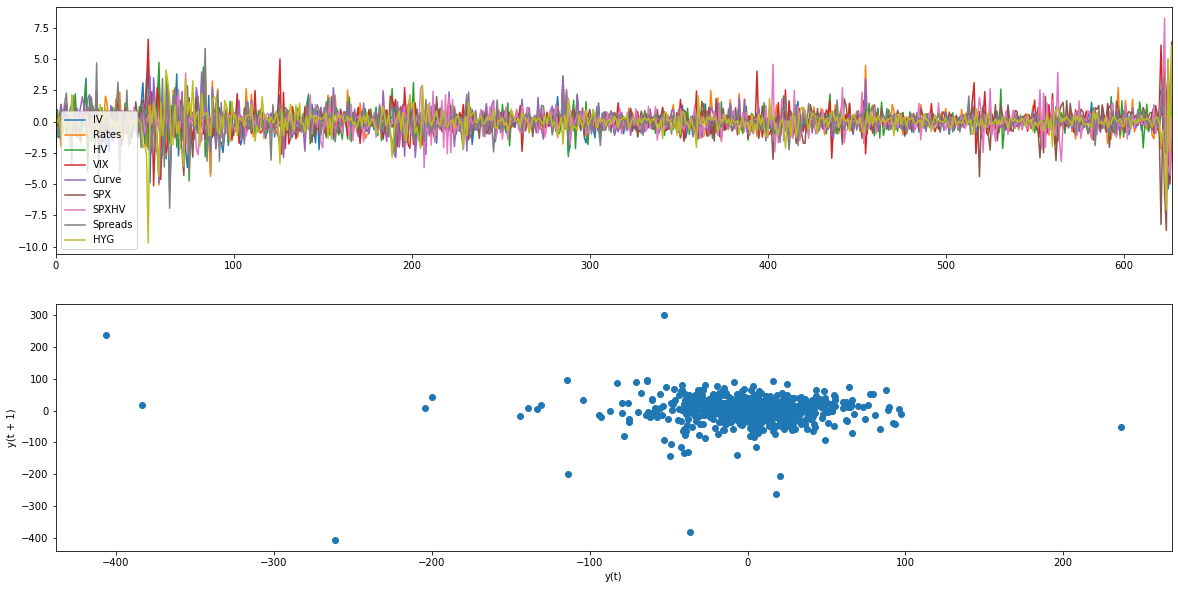

In [34]:
# Is the data Random.  Random data will not exhibit a structure in the lag plot

fig,(ax1,ax2)=plt.subplots(nrows=2, ncols=1, figsize=(20,10))
t_scaled.plot(ax=ax1) # series plot
pd.plotting.lag_plot(t) #lag plot

# Run Autocorrelation Plots on each of the Differenced Variables for All Days in the Time Series

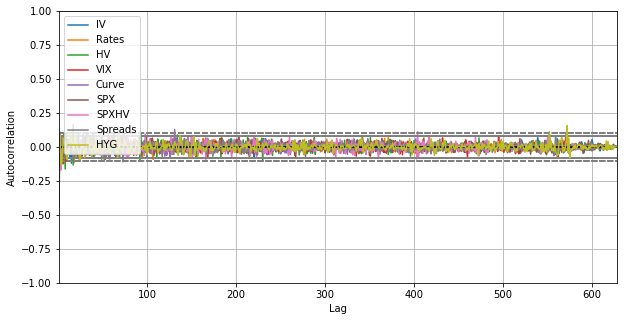

In [35]:
pd.plotting.autocorrelation_plot(t.IV, label = 'IV')
pd.plotting.autocorrelation_plot(t.Rates, label = 'Rates')
pd.plotting.autocorrelation_plot(t.HV, label = 'HV')
pd.plotting.autocorrelation_plot(t.VIX, label = 'VIX')
pd.plotting.autocorrelation_plot(t.Curve, label = 'Curve')
pd.plotting.autocorrelation_plot(t.SPX, label = 'SPX')
pd.plotting.autocorrelation_plot(t.SPXHV, label = 'SPXHV')
pd.plotting.autocorrelation_plot(t.Spreads, label = 'Spreads')
pd.plotting.autocorrelation_plot(t.HYG, label = 'HYG')
plt.rcParams["figure.figsize"] = (20,15)

# Run Autocorrelation and PACF plots for each differenced variable for 75 days

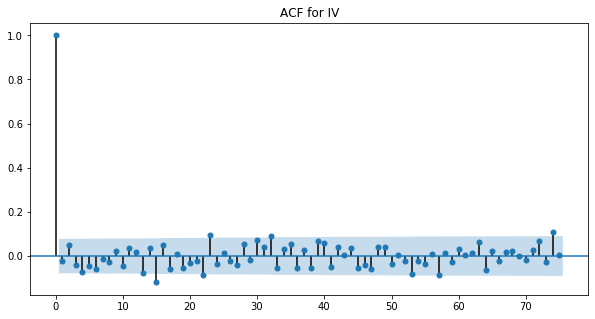

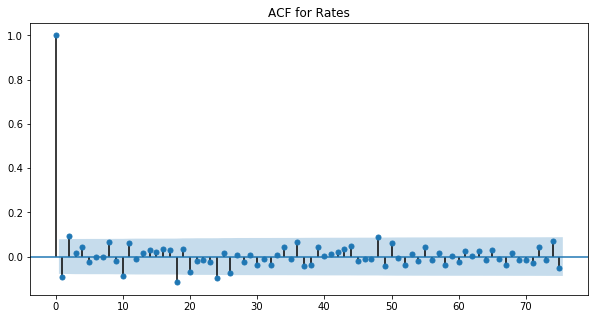

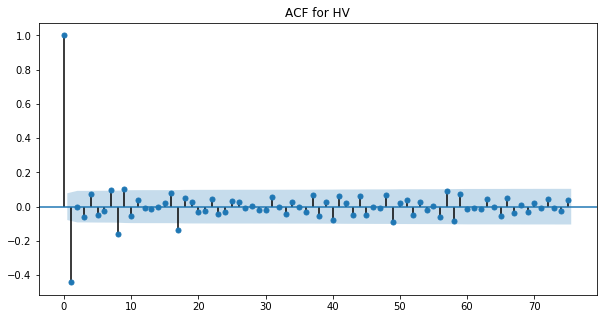

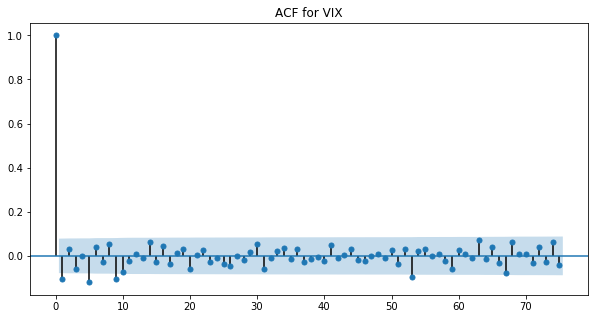

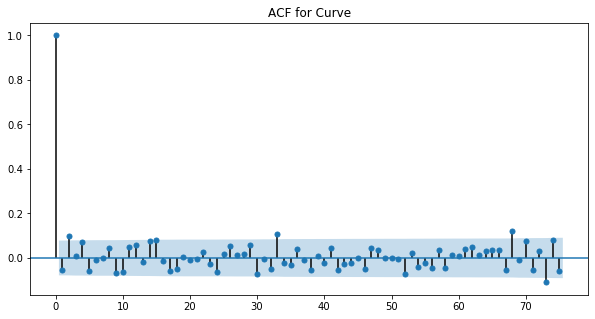

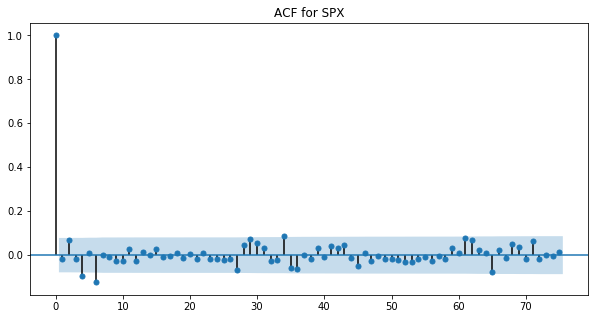

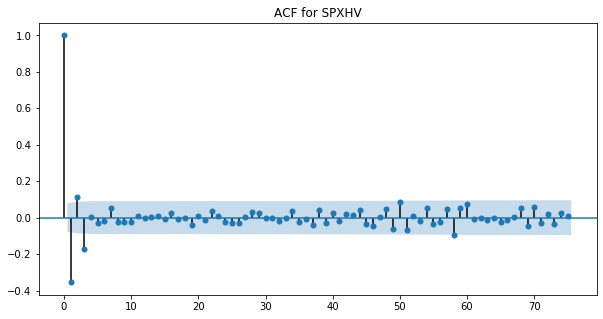

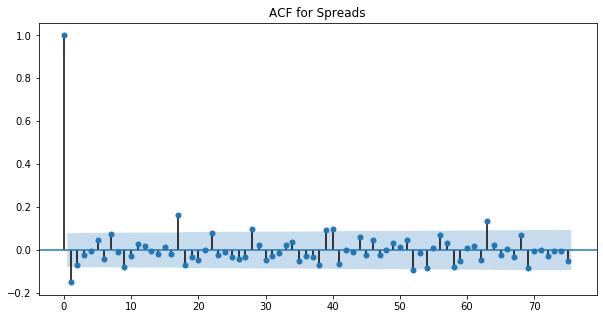

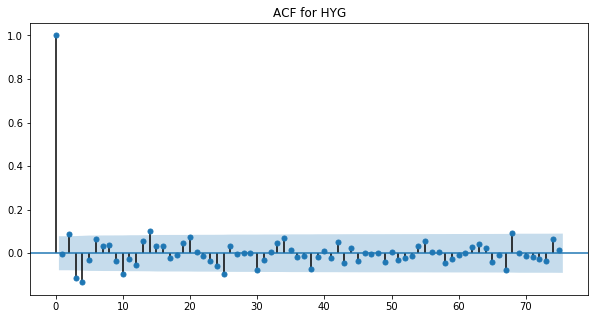

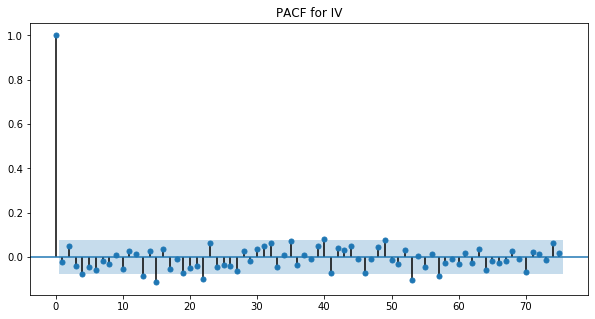

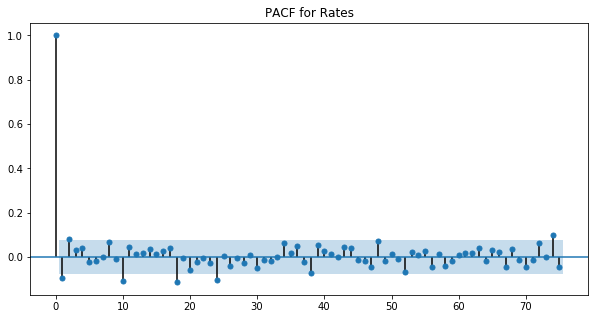

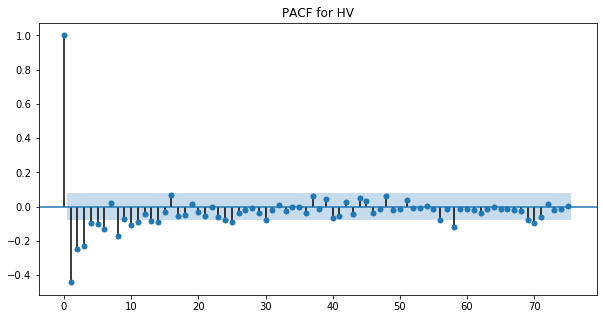

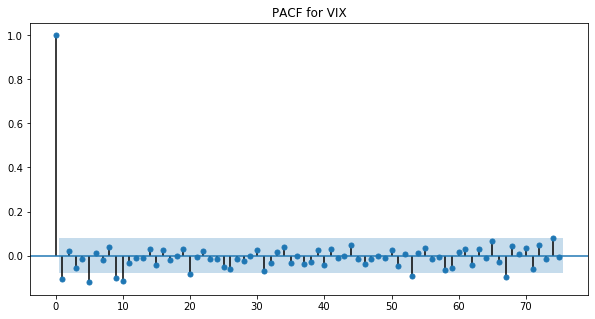

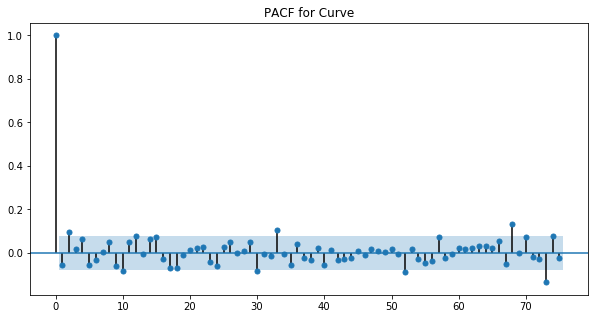

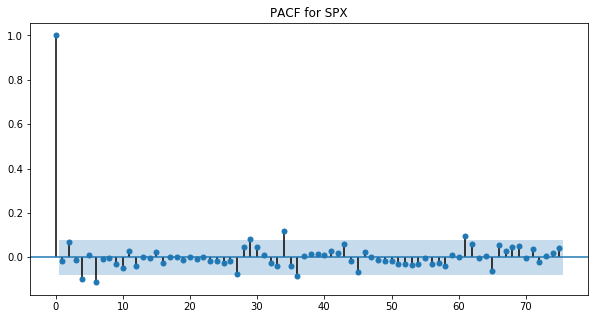

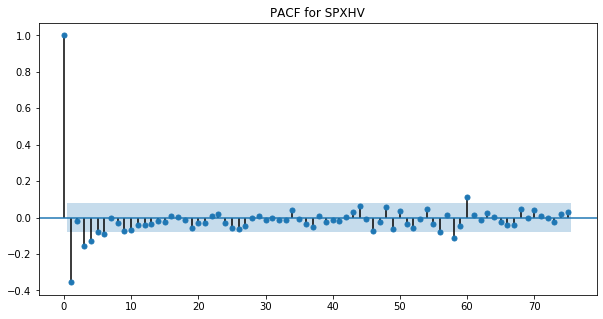

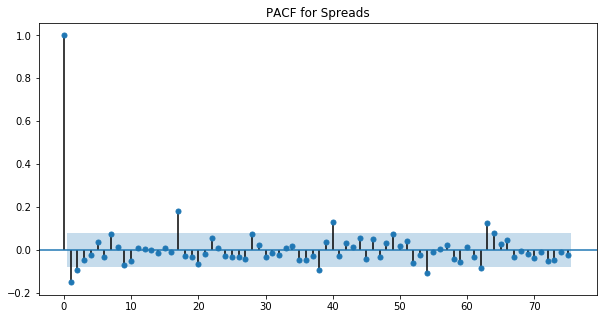

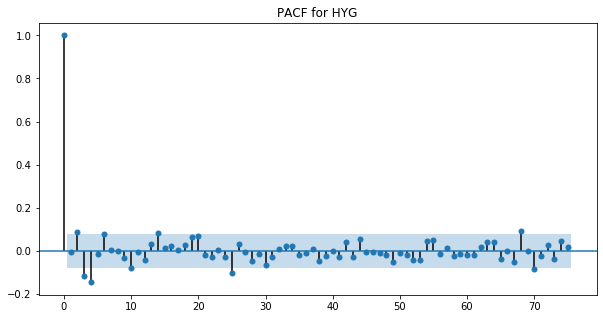

In [36]:
plt.rcParams["figure.figsize"] = (10,5)

for i in t:
    plot_acf(t[i],lags=75)
    plt.title('ACF for %s'%i)
    
for j in t:
    plot_pacf(t[j], lags=75)
    plt.title('PACF for %s'%j)

# Run Granger Causality Tests on Every Differenced Variable

In [37]:
grangers_causation_matrix(t, variables = t.columns)

,IV_x,Rates_x,HV_x,VIX_x,Curve_x,SPX_x,SPXHV_x,Spreads_x,HYG_x
IV_y,1.0000,0.0002,0.0251,0.0480,0.0203,0.0004,0.0000,0.0001,0.3193
Rates_y,0.0003,1.0000,0.0059,0.0000,0.2059,0.0595,0.2122,0.0014,0.0000
HV_y,0.0000,0.2343,1.0000,0.0000,0.0000,0.0072,0.0014,0.0068,0.0000
VIX_y,0.0077,0.0705,0.1774,1.0000,0.0006,0.0059,0.0042,0.0268,0.0021
Curve_y,0.0006,0.0433,0.0003,0.0000,1.0000,0.0492,0.0079,0.0152,0.0000
SPX_y,0.0001,0.2023,0.2738,0.0010,0.0984,1.0000,0.0000,0.3524,0.0024
SPXHV_y,0.0031,0.2151,0.0005,0.0394,0.4651,0.0000,1.0000,0.0005,0.0279
Spreads_y,0.0021,0.0012,0.0001,0.0012,0.0081,0.2203,0.0145,1.0000,0.0000
HYG_y,0.0000,0.0057,0.0000,0.0000,0.0003,0.0002,0.0000,0.0045,1.0000


In [38]:
from statsmodels.tsa.stattools import grangercausalitytests
print(grangercausalitytests(t[['IV','Rates']], maxlag=30, addconst=True, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.8011 , p=0.0002  , df_denom=624, df_num=1
ssr based chi2 test:   chi2=13.8674 , p=0.0002  , df=1
likelihood ratio test: chi2=13.7163 , p=0.0002  , df=1
parameter F test:         F=13.8011 , p=0.0002  , df_denom=624, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.0272  , p=0.0010  , df_denom=621, df_num=2
ssr based chi2 test:   chi2=14.1676 , p=0.0008  , df=2
likelihood ratio test: chi2=14.0097 , p=0.0009  , df=2
parameter F test:         F=7.0272  , p=0.0010  , df_denom=621, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.0309  , p=0.0019  , df_denom=618, df_num=3
ssr based chi2 test:   chi2=15.2635 , p=0.0016  , df=3
likelihood ratio test: chi2=15.0801 , p=0.0017  , df=3
parameter F test:         F=5.0309  , p=0.0019  , df_denom=618, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.8445  , p=0.0007  

{1: ({'ssr_ftest': (13.801076293290848, 0.00022144617762864395, 624.0, 1), 'ssr_chi2test': (13.867427621623976, 0.00019616902878318213, 1), 'lrtest': (13.716298218793781, 0.00021260148632696772, 1), 'params_ftest': (13.801076293290846, 0.00022144617762864395, 624.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022CAC359BE0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022CAC359048>, array([[0., 1., 0.]])]), 2: ({'ssr_ftest': (7.027225688522486, 0.0009597041371665393, 621.0, 2), 'ssr_chi2test': (14.167611210998636, 0.0008385757796767179, 2), 'lrtest': (14.009669340323853, 0.0009074839570512894, 2), 'params_ftest': (7.02722568852243, 0.000959704137166599, 621.0, 2.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022CAB98BC50>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022CAB98BE48>, array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])]), 

# Run Cointegration Tests for Each of the Differenced Variables

In [39]:
cointegration_test(t)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
IV     ::  1316.71   > 179.5199  =>   True
Rates  ::  1043.51   > 143.6691  =>   True
HV     ::  829.13    > 111.7797  =>   True
VIX    ::  637.37    > 83.9383   =>   True
Curve  ::  481.47    > 60.0627   =>   True
SPX    ::  354.78    > 40.1749   =>   True
SPXHV  ::  241.73    > 24.2761   =>   True
Spreads ::  142.34    > 12.3212   =>   True
HYG    ::  58.82     > 4.1296    =>   True


# Run Dickey-Fuller Tests on the Differenced Data to Check for Stationarity

In [40]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in t.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "IV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.4055
 No. Lags Chosen       = 3
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Rates" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -16.9517
 No. Lags Chosen       = 1
 Critical value 1%     = -3.441
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HV" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 

# Test for best Lags to Use

In [41]:
model = VAR(t)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  9.25955356411584
BIC :  9.897010005355016
FPE :  10504.698470118594
HQIC:  9.507211604596746 

Lag Order = 2
AIC :  9.12128458683646
BIC :  10.333950582775943
FPE :  9149.481041349263
HQIC:  9.592451136442802 

Lag Order = 3
AIC :  8.880439231103246
BIC :  10.669740696276962
FPE :  7193.832740021
HQIC:  9.575700664142108 

Lag Order = 4
AIC :  8.758017882075848
BIC :  11.125386588272994
FPE :  6369.468900550275
HQIC:  9.677963033680527 

Lag Order = 5
AIC :  8.709652228739232
BIC :  11.656525838334748
FPE :  6075.839219636991
HQIC:  9.854872408998594 

Lag Order = 6
AIC :  8.636254419499071
BIC :  12.164076519026231
FPE :  5655.717564515369
HQIC:  10.007343427689747 

Lag Order = 7
AIC :  8.620846154620274
BIC :  12.73106628858756
FPE :  5582.857805906465
HQIC:  10.218400293542635 

Lag Order = 8
AIC :  8.620809587339643
BIC :  13.31488329229402
FPE :  5600.916474766141
HQIC:  10.445427677758452 

Lag Order = 9
AIC :  8.620602907020462
BIC :  13.899991745859285
FPE

C:\Users\pjant\Miniconda3\envs\data601\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [42]:
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,9.854,9.919,1.903e+04,9.879
1,9.111,9.764*,9053.,9.365*
2,8.935,10.18,7597.,9.418
3,8.667,10.49,5810.,9.378
4,8.553,10.97,5192.,9.493
5,8.499,11.50,4924.,9.667
6,8.416,12.01,4538.,9.813
7,8.403,12.58,4494.,10.03
8,8.377,13.14,4393.,10.23
9,8.368*,13.72,4371.*,10.45


# Fit the Model

In [43]:
model_fitted = model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, May, 2020
Time:                     12:43:47
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    13.9000
Nobs:                     619.000    HQIC:                   10.6729
Log likelihood:          -9834.98    FPE:                    5623.45
AIC:                      8.62060    Det(Omega_mle):         1835.51
--------------------------------------------------------------------
Results for equation IV
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.174573         0.274789           -0.635           0.525
L1.IV             -0.049452         0.053447           -0.925           0.355
L1.Rates         -17.283942         3.322457           -5.202           0.0

# Run Durbin Watson Stats on Fitted Model

In [44]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(t.columns, out):
    print((col), ':', round(val, 2))

IV : 2.01
Rates : 2.0
HV : 2.01
VIX : 2.01
Curve : 1.99
SPX : 1.99
SPXHV : 2.03
Spreads : 1.99
HYG : 1.98


# Run the Forecasts

In [45]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = t.values[-lag_order:]
forecast_input

9


array([[-1.21600000e+00, -8.20000000e-03, -3.80911083e-01,
        -1.79000000e+00, -1.17000000e-02,  2.81600000e+01,
        -1.27919357e+00, -1.07000000e+00,  4.30000000e-01],
       [ 5.64740000e+00, -1.34000000e-01, -1.25043567e-01,
         3.40000000e+00, -4.21000000e-02, -3.61900000e+01,
         3.31804499e+00, -1.88000000e+00, -7.00000000e-02],
       [ 1.73200000e+01, -2.80300000e-01,  2.32338290e-01,
         2.30300000e+01,  1.01500000e-01, -3.83530000e+02,
         2.12661559e+01,  4.13000000e+00, -2.29000000e+00],
       [ 1.12300000e+01, -2.76700000e-01,  9.08003170e-01,
         1.83000000e+00,  6.41000000e-02,  1.81500000e+01,
         2.47495091e+01,  1.10000000e+01, -9.90000000e-01],
       [ 2.69825000e+01,  1.22500000e-01,  7.10850849e-01,
         1.58900000e+01,  2.37700000e-01, -2.61350000e+02,
         8.40721228e+01, -7.75000000e+00, -5.00000000e+00],
       [ 7.23750000e+00, -1.97200000e-01,  9.83246509e-01,
         8.21000000e+00, -1.73700000e-01, -4.061000

# Test the Model

In [46]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = t.values[-lag_order:]
forecast_input

9


array([[-1.21600000e+00, -8.20000000e-03, -3.80911083e-01,
        -1.79000000e+00, -1.17000000e-02,  2.81600000e+01,
        -1.27919357e+00, -1.07000000e+00,  4.30000000e-01],
       [ 5.64740000e+00, -1.34000000e-01, -1.25043567e-01,
         3.40000000e+00, -4.21000000e-02, -3.61900000e+01,
         3.31804499e+00, -1.88000000e+00, -7.00000000e-02],
       [ 1.73200000e+01, -2.80300000e-01,  2.32338290e-01,
         2.30300000e+01,  1.01500000e-01, -3.83530000e+02,
         2.12661559e+01,  4.13000000e+00, -2.29000000e+00],
       [ 1.12300000e+01, -2.76700000e-01,  9.08003170e-01,
         1.83000000e+00,  6.41000000e-02,  1.81500000e+01,
         2.47495091e+01,  1.10000000e+01, -9.90000000e-01],
       [ 2.69825000e+01,  1.22500000e-01,  7.10850849e-01,
         1.58900000e+01,  2.37700000e-01, -2.61350000e+02,
         8.40721228e+01, -7.75000000e+00, -5.00000000e+00],
       [ 7.23750000e+00, -1.97200000e-01,  9.83246509e-01,
         8.21000000e+00, -1.73700000e-01, -4.061000

In [47]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_test.index[-nobs:], columns=t.columns + '_1d')
df_forecast

,IV_1d,Rates_1d,HV_1d,VIX_1d,Curve_1d,SPX_1d,SPXHV_1d,Spreads_1d,HYG_1d
Date,,,,,,,,,
2020-04-17,-4.881581,-0.133730,0.505395,-6.883874,-0.028773,-97.011435,-29.755394,2.736435,1.467151
2020-04-24,-4.899099,-0.056803,-0.737128,-4.101679,-0.006502,127.382798,29.728789,-4.449753,3.296171
2020-05-01,-0.928707,-0.440948,0.550708,4.233325,-0.190849,-11.084046,-5.348490,-5.494358,-3.491728
2020-05-08,2.655184,0.089678,-0.931547,-1.890730,-0.111609,3.170599,-15.634946,2.325161,-0.790798
2020-05-15,-2.855377,0.037078,0.473530,-5.141199,-0.069499,-100.623911,17.262352,-8.154451,0.245401


In [48]:
forecast_input.shape, nobs, fc.shape

((9, 9), 5, (5, 9))

In [49]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
#        if second_diff:
#            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [50]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)       
df_results.loc[:, ['IV_forecast', 'Rates_forecast', 'HV_forecast', 'VIX_forecast', 'Curve_forecast',
                   'SPX_forecast', 'SPXHV_forecast', 'CDXHY_forecast','Spreads_forecast','HYG_forecast']]

C:\Users\pjant\Miniconda3\envs\data601\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,IV_forecast,Rates_forecast,HV_forecast,VIX_forecast,Curve_forecast,SPX_forecast,SPXHV_forecast,CDXHY_forecast,Spreads_forecast,HYG_forecast
Date,,,,,,,,,,
2020-04-17,76.118419,0.674270,1.101395,34.786126,0.313827,2692.808565,18.512060,NaN,10.486435,83.827151
2020-04-24,71.219321,0.617467,0.364267,30.684447,0.307326,2820.191362,48.240849,NaN,6.036682,87.123322
2020-05-01,70.290614,0.176519,0.914975,34.917772,0.116476,2809.107317,42.892359,NaN,0.542324,83.631594
2020-05-08,72.945798,0.266198,-0.016572,33.027042,0.004867,2812.277916,27.257413,NaN,2.867486,82.840796
2020-05-15,70.090421,0.303275,0.456958,27.885843,-0.064632,2711.654005,44.519764,NaN,-5.286966,83.086197


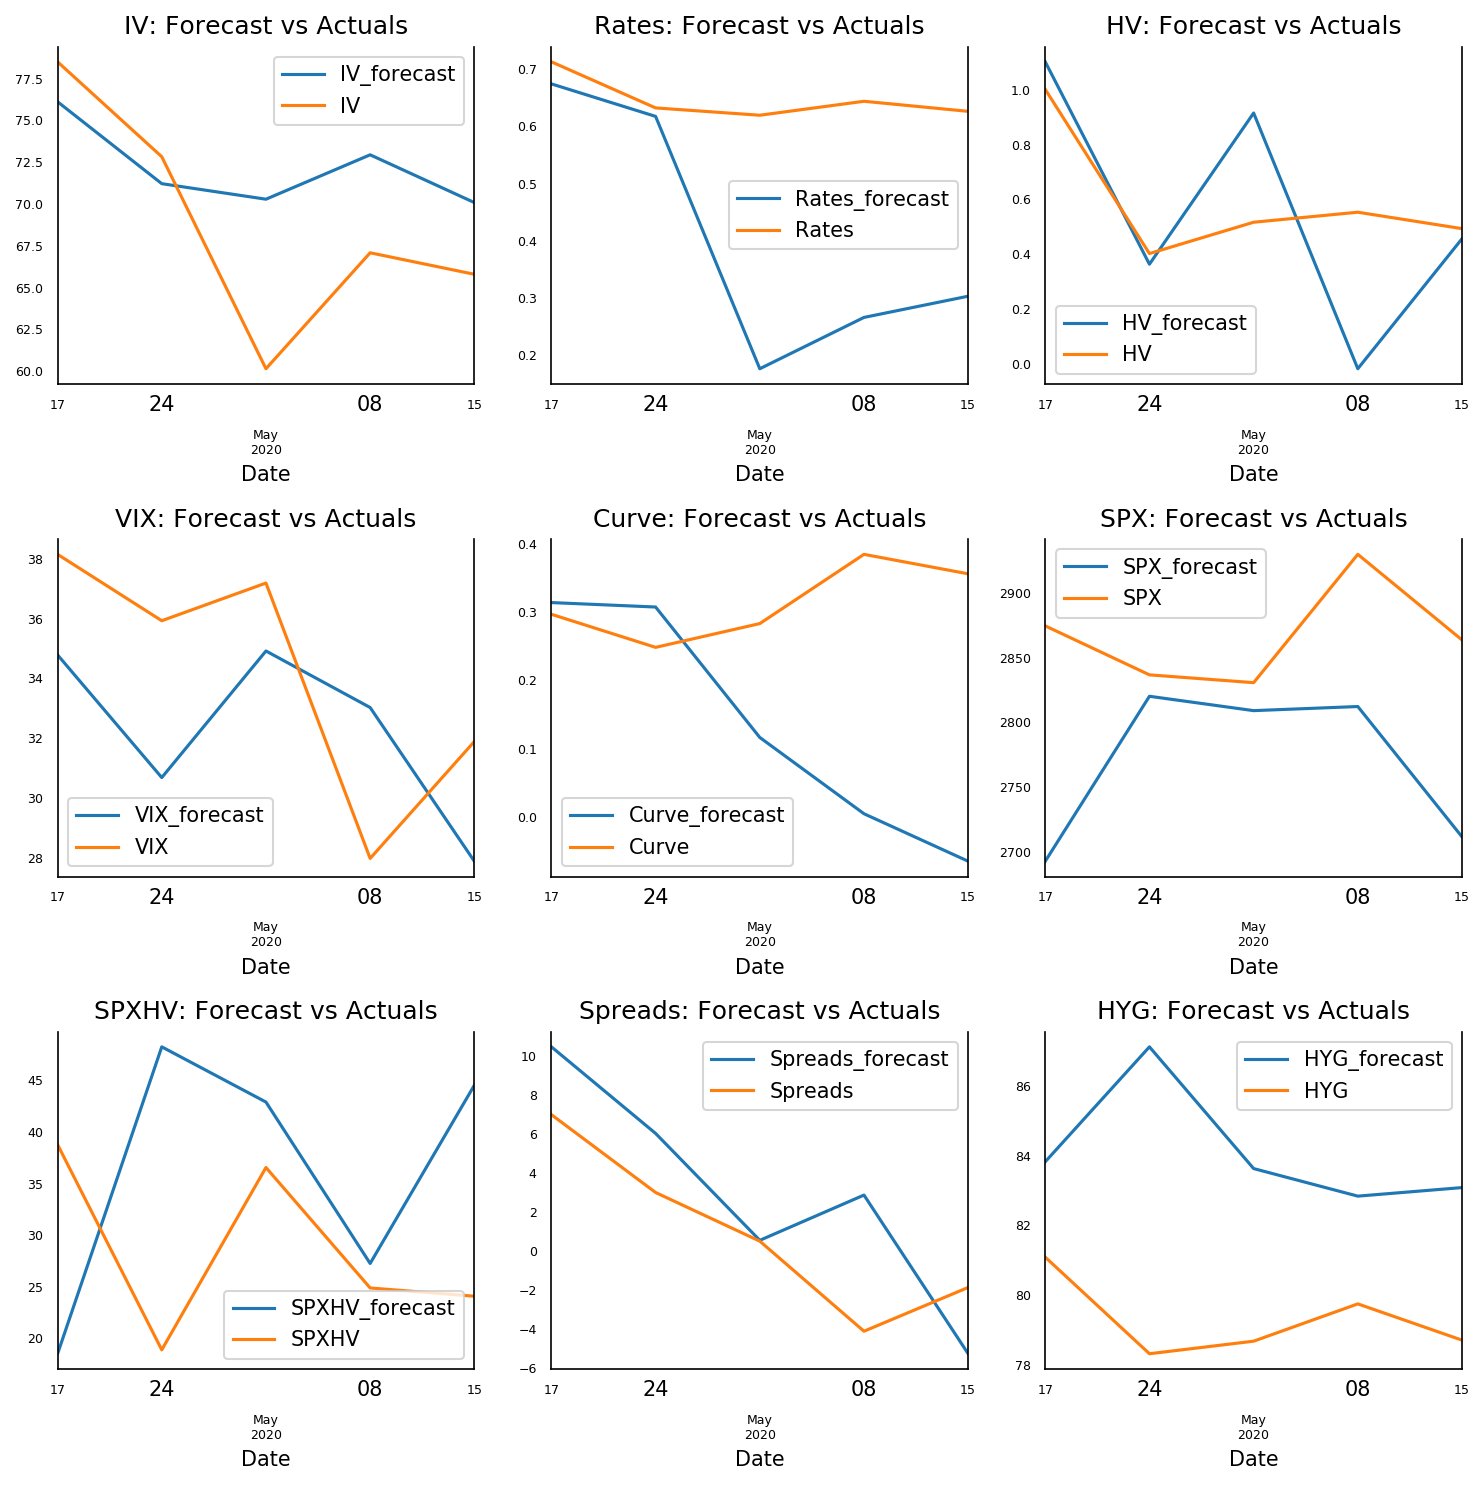

In [51]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/3), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Run the Model Accuracy Statistics

In [52]:
# mape is mean absolute percentage error (errors / values)
# me is margin of error (a statistic expressing the amount of random sampling error in the results of a survey)
# mae is mean absolute error
# mpe is mean percentage error
# rmse is root mean squared error
# corr is correlation between the forecast and the actual values

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: IV')
accuracy_prod = forecast_accuracy(df_results['IV_forecast'].values, df_test['IV'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Rates')
accuracy_prod = forecast_accuracy(df_results['Rates_forecast'].values, df_test['Rates'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: HV')
accuracy_prod = forecast_accuracy(df_results['HV_forecast'].values, df_test['HV'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: VIX')
accuracy_prod = forecast_accuracy(df_results['VIX_forecast'].values, df_test['VIX'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Curve')
accuracy_prod = forecast_accuracy(df_results['Curve_forecast'].values, df_test['Curve'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: SPX')
accuracy_prod = forecast_accuracy(df_results['SPX_forecast'].values, df_test['SPX'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: SPXHV')
accuracy_prod = forecast_accuracy(df_results['SPXHV_forecast'].values, df_test['SPXHV'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Spreads')
accuracy_prod = forecast_accuracy(df_results['Spreads_forecast'].values, df_test['Spreads'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))
    
print('\nForecast Accuracy of: HYG')
accuracy_prod = forecast_accuracy(df_results['HYG_forecast'].values, df_test['HYG'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: IV
mape :  0.0747
me :  3.2586
mae :  4.858
mpe :  0.0537
rmse :  5.725
corr :  0.7938
minmax :  0.0677

Forecast Accuracy of: Rates
mape :  0.379
me :  -0.2394
mae :  0.2394
mpe :  -0.379
rmse :  0.2983
corr :  0.692
minmax :  0.379

Forecast Accuracy of: HV
mape :  0.4141
me :  -0.0295
mae :  0.2288
mpe :  -0.0662
rmse :  0.3151
corr :  0.6296
minmax :  0.3453

Forecast Accuracy of: VIX
mape :  0.1202
me :  -1.9678
mae :  3.9866
mpe :  -0.0481
rmse :  4.1352
corr :  0.4065
minmax :  0.1147

Forecast Accuracy of: Curve
mape :  0.6106
me :  -0.1781
mae :  0.2086
mpe :  -0.4924
rmse :  0.2655
corr :  -0.8212
minmax :  0.6008

Forecast Accuracy of: SPX
mape :  0.034
me :  -97.8942
mae :  97.8942
mpe :  -0.034
rmse :  118.9147
corr :  -0.0691
minmax :  0.034

Forecast Accuracy of: SPXHV
mape :  0.6388
me :  7.6489
mae :  15.7519
mpe :  0.4298
rmse :  18.6301
corr :  -0.5653
minmax :  0.365

Forecast Accuracy of: Spreads
mape :  1.0203
me :  2.0312
mae :  3.394
mpe : 

In [53]:
error_table = df_results.loc[:, ['IV_forecast', 'Rates_forecast', 'HV_forecast', 'VIX_forecast', 'Curve_forecast', 
                                'SPX_forecast','SPXHV_forecast','Spreads_forecast','HYG_forecast']].join(df_test)
error_table

,IV_forecast,Rates_forecast,HV_forecast,VIX_forecast,Curve_forecast,SPX_forecast,SPXHV_forecast,Spreads_forecast,HYG_forecast,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,,,,,,,,,,
2020-04-17,76.118419,0.674270,1.101395,34.786126,0.313827,2692.808565,18.512060,10.486435,83.827151,78.5064,0.7128,1.001000,38.15,0.2967,2874.56,38.769620,7.00,81.09
2020-04-24,71.219321,0.617467,0.364267,30.684447,0.307326,2820.191362,48.240849,6.036682,87.123322,72.8300,0.6323,0.403004,35.93,0.2483,2836.74,18.888296,3.00,78.32
2020-05-01,70.290614,0.176519,0.914975,34.917772,0.116476,2809.107317,42.892359,0.542324,83.631594,60.1500,0.6195,0.517108,37.19,0.2831,2830.71,36.552269,0.50,78.68
2020-05-08,72.945798,0.266198,-0.016572,33.027042,0.004867,2812.277916,27.257413,2.867486,82.840796,67.0854,0.6439,0.553637,27.98,0.3844,2929.80,24.884263,-4.13,79.75
2020-05-15,70.090421,0.303275,0.456958,27.885843,-0.064632,2711.654005,44.519764,-5.286966,83.086197,65.8000,0.6263,0.493792,31.89,0.3559,2863.70,24.083597,-1.88,78.71


In [54]:
error_measures = pd.DataFrame()
for i in range(len(df_test.columns)):
    error_measures[i] = list(forecast_accuracy(error_table.iloc[:,i].values, error_table.iloc[:,i+9].values).values())[0:7]

error_measures.columns = df_test.columns
error_measures.index = ('mape', 'me', 'mae', 'mpe', 'rmse', 'corr', 'minmax')

error_measures

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
mape,0.074737,0.378985,0.414070,0.120242,0.610591,0.033980,0.638778,1.020292,0.060689
me,3.258555,-0.239414,-0.029504,-1.967754,-0.178107,-97.894167,7.648880,2.031192,4.791812
mae,4.858019,0.239414,0.228809,3.986571,0.208568,97.894167,15.751904,3.393979,4.791812
mpe,0.053723,-0.378985,-0.066189,-0.048090,-0.492413,-0.033980,0.429774,0.342570,0.060689
rmse,5.725046,0.298309,0.315079,4.135224,0.265493,118.914711,18.630119,4.048473,5.257621
corr,0.793787,0.692031,0.629642,0.406532,-0.821185,-0.069147,-0.565312,0.749839,-0.399274
minmax,0.067670,0.378985,0.345328,0.114729,0.600829,0.033980,0.364977,0.308324,0.056577


In [68]:
from datetime import datetime

directory = (r'c:/Users/pjant/Trading/Market Price Prediction Results/')

#csv_file = 'weekly error measures from ' + str(datetime.now().strftime('%Y%m%d'))+'.csv'
csv_file = 'weekly error measures from 20200417.csv'
error_measures.to_csv(directory + csv_file)

# Next n Weeks Predictions

In [56]:
df_w = df[df.index.dayofweek==4]

In [57]:
df_w.index[-1]

Timestamp('2020-05-15 00:00:00')

In [58]:
bd = pd.tseries.offsets.Week(n = nobs)
bd

<5 * Weeks: weekday=None>

In [59]:
df_w.index[-1] + bd

Timestamp('2020-06-19 00:00:00')

In [60]:
ed = bd + df_w.index[-1]
fc_dates = pd.bdate_range(pd.tseries.offsets.Week(1) + df_w.index[-1], ed, freq='7D')
fc_dates = fc_dates[0:nobs]
fc_dates

DatetimeIndex(['2020-05-22', '2020-05-29', '2020-06-05', '2020-06-12',
               '2020-06-19'],
              dtype='datetime64[ns]', freq='7D')

In [61]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=fc_dates, columns=df.columns + '_1d')
df_forecast

,IV_1d,Rates_1d,HV_1d,VIX_1d,Curve_1d,SPX_1d,SPXHV_1d,Spreads_1d,HYG_1d
2020-05-22,-4.881581,-0.133730,0.505395,-6.883874,-0.028773,-97.011435,-29.755394,2.736435,1.467151
2020-05-29,-4.899099,-0.056803,-0.737128,-4.101679,-0.006502,127.382798,29.728789,-4.449753,3.296171
2020-06-05,-0.928707,-0.440948,0.550708,4.233325,-0.190849,-11.084046,-5.348490,-5.494358,-3.491728
2020-06-12,2.655184,0.089678,-0.931547,-1.890730,-0.111609,3.170599,-15.634946,2.325161,-0.790798
2020-06-19,-2.855377,0.037078,0.473530,-5.141199,-0.069499,-100.623911,17.262352,-8.154451,0.245401


In [62]:
fc

array([[-4.88158083e+00, -1.33729797e-01,  5.05394915e-01,
        -6.88387356e+00, -2.87726256e-02, -9.70114353e+01,
        -2.97553939e+01,  2.73643517e+00,  1.46715076e+00],
       [-4.89909853e+00, -5.68033326e-02, -7.37127661e-01,
        -4.10167919e+00, -6.50172149e-03,  1.27382798e+02,
         2.97287892e+01, -4.44975285e+00,  3.29617137e+00],
       [-9.28706682e-01, -4.40947627e-01,  5.50707986e-01,
         4.23332466e+00, -1.90849353e-01, -1.10840457e+01,
        -5.34849016e+00, -5.49435783e+00, -3.49172805e+00],
       [ 2.65518391e+00,  8.96783217e-02, -9.31547009e-01,
        -1.89072984e+00, -1.11609240e-01,  3.17059914e+00,
        -1.56349462e+01,  2.32516103e+00, -7.90797836e-01],
       [-2.85537697e+00,  3.70778550e-02,  4.73530129e-01,
        -5.14119943e+00, -6.94990123e-02, -1.00623911e+02,
         1.72623517e+01, -8.15445114e+00,  2.45401065e-01]])

In [63]:
df_predictions = invert_transformation(df_w, df_forecast, second_diff=False)       
df_predictions = df_predictions.loc[:, ['IV_forecast', 'Rates_forecast', 'HV_forecast', 'VIX_forecast', 'Curve_forecast',
                   'SPX_forecast', 'SPXHV_forecast','Spreads_forecast','HYG_forecast']]

df_w_lastrow = df_w.iloc[[-1]]
df_w_lastrow.columns = df_predictions.columns

df_output = pd.concat([df_w_lastrow, df_predictions])
df_output

,IV_forecast,Rates_forecast,HV_forecast,VIX_forecast,Curve_forecast,SPX_forecast,SPXHV_forecast,Spreads_forecast,HYG_forecast
2020-05-15,65.800000,0.626300,0.493792,31.890000,0.355900,2863.700000,24.083597,-1.880000,78.710000
2020-05-22,60.918419,0.492570,0.999187,25.006126,0.327127,2766.688565,-5.671797,0.856435,80.177151
2020-05-29,56.019321,0.435767,0.262060,20.904447,0.320626,2894.071362,24.056992,-3.593318,83.473322
2020-06-05,55.090614,-0.005181,0.812768,25.137772,0.129776,2882.987317,18.708502,-9.087676,79.981594
2020-06-12,57.745798,0.084498,-0.118779,23.247042,0.018167,2886.157916,3.073556,-6.762514,79.190796
2020-06-19,54.890421,0.121575,0.354751,18.105843,-0.051332,2785.534005,20.335908,-14.916966,79.436197


In [64]:
from datetime import datetime

directory = (r'c:/Users/pjant/Trading/Market Price Prediction Results/')

csv_file = 'weekly predictions from ' + str(datetime.now().strftime('%Y%m%d'))+'.csv'
#csv_file = 'weekly predictions from 20200508.csv'
df_results.to_csv(directory + csv_file)

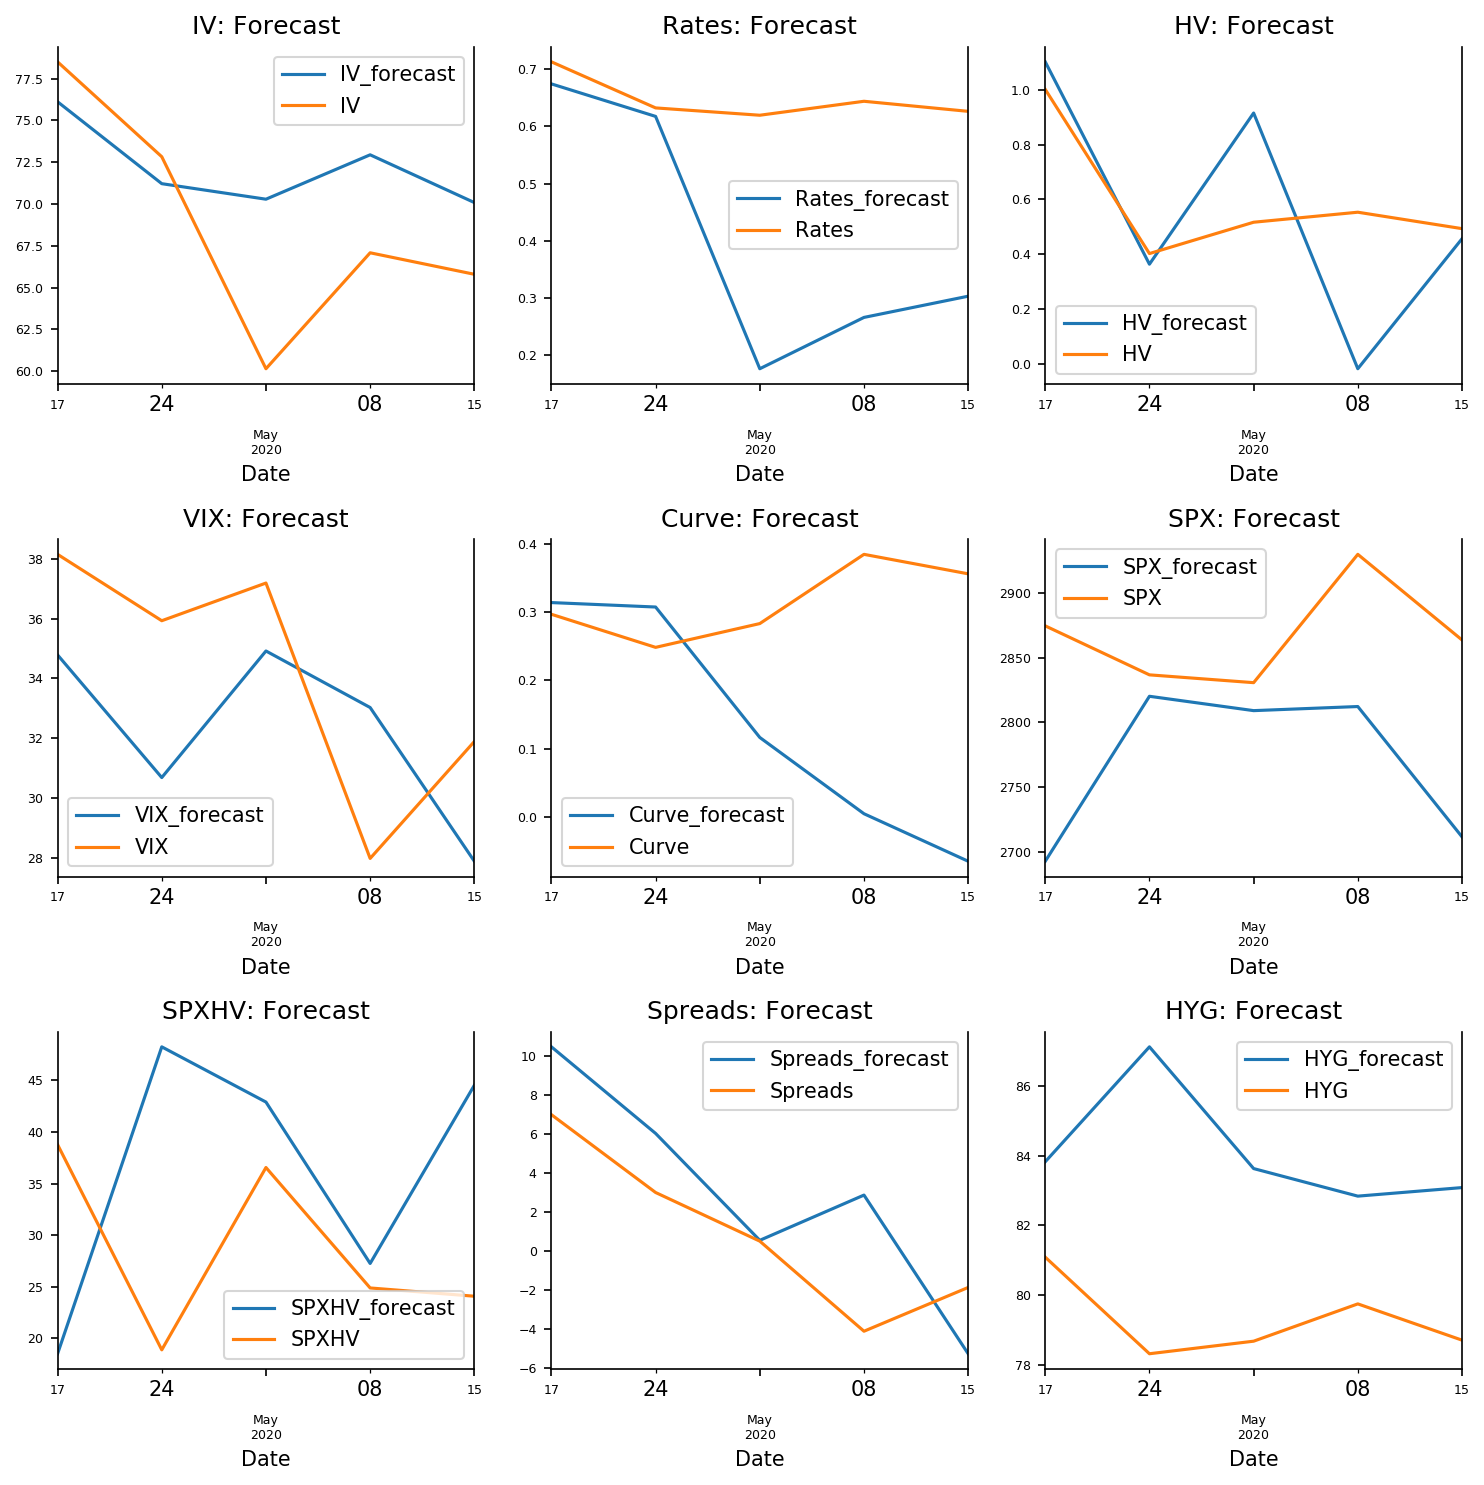

In [65]:
fig, axes = plt.subplots(nrows=int(len(df_w.columns)/3), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_w.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_w[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast")
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();